In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ETH-USD.csv', index_col=0, parse_dates=True)

In [3]:
df['Ret'] = df['Close'].diff()

In [4]:
type(df[['Ret']])

pandas.core.frame.DataFrame

In [4]:
sorted4 = np.sort(df['Ret'])

In [5]:
sorted3 = np.sort(df['Ret'][:1328])

In [6]:
sorted2 = np.sort(df['Ret'][:828])

In [7]:
sorted1 = np.sort(df['Ret'][:328])

array([-919.390869, -501.985108, -443.188476, ...,  534.01123 ,
        592.012451,         nan])

In [8]:
sorted2 = sorted2 - 3

In [9]:
sorted4[920:1300] = sorted4[920:1300] - 15

In [26]:
sorted4[920:1100]

array([-8.92688 , -8.893723, -8.891899, -8.889038, -8.877197, -8.857346,
       -8.848022, -8.847656, -8.820159, -8.809326, -8.808853, -8.80188 ,
       -8.792587, -8.752471, -8.751495, -8.736084, -8.723511, -8.702728,
       -8.683166, -8.646225, -8.622223, -8.584671, -8.584366, -8.551148,
       -8.474792, -8.46637 , -8.391037, -8.316391, -8.304199, -8.278076,
       -8.234497, -8.229126, -8.227417, -8.21434 , -8.19777 , -8.189209,
       -8.091721, -8.061158, -8.054199, -8.049591, -8.038819, -8.022705,
       -8.003998, -7.995728, -7.985153, -7.959015, -7.91301 , -7.900635,
       -7.864029, -7.844971, -7.834335, -7.710327, -7.709396, -7.686401,
       -7.679199, -7.612625, -7.571411, -7.570908, -7.534913, -7.511459,
       -7.503433, -7.498749, -7.466507, -7.430786, -7.423355, -7.378647,
       -7.373077, -7.326477, -7.309082, -7.306885, -7.289277, -7.282898,
       -7.218033, -7.215713, -7.187012, -7.172821, -7.172333, -7.152298,
       -7.14621 , -7.093994, -7.073593, -7.070068, 

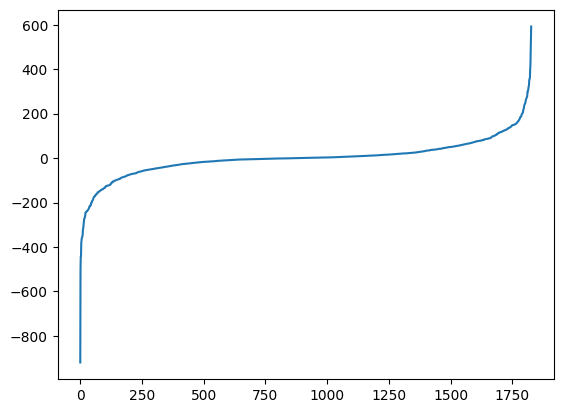

In [15]:
plt.plot(sorted)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_distribution_with_sigmas(data):
    """
    Plots the distribution of the provided array with the mean, 1, 2, 3 sigmas highlighted,
    and overlays a normal distribution curve based on the data's mean and standard deviation.
    
    Parameters:
    data (array-like): The input array whose distribution needs to be plotted.
    """
    # Check if the data contains NaN values
    data = np.array(data)
    data = data[~np.isnan(data)]  # Remove NaN values if present

    # Calculate statistics
    mean = np.mean(data)
    std_dev = np.std(data)

    # Create a histogram of the data
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')

    # Generate normal distribution curve based on the calculated mean and std_dev
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis for the normal distribution plot
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std_dev)
    
    # Plot the normal distribution curve
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n(mean: {mean:.2f}, std_dev: {std_dev:.2f})')

    # Plot mean
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

    # Plot standard deviations (1 sigma, 2 sigma, 3 sigma)
    plt.axvline(mean - std_dev, color='b', linestyle='dashed', linewidth=1, label=f'-1σ: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='b', linestyle='dashed', linewidth=1, label=f'+1σ: {mean + std_dev:.2f}')

    plt.axvline(mean - 2 * std_dev, color='y', linestyle='dashed', linewidth=1, label=f'-2σ: {mean - 2 * std_dev:.2f}')
    plt.axvline(mean + 2 * std_dev, color='y', linestyle='dashed', linewidth=1, label=f'+2σ: {mean + 2 * std_dev:.2f}')

    plt.axvline(mean - 3 * std_dev, color='c', linestyle='dashed', linewidth=1, label=f'-3σ: {mean - 3 * std_dev:.2f}')
    plt.axvline(mean + 3 * std_dev, color='c', linestyle='dashed', linewidth=1, label=f'+3σ: {mean + 3 * std_dev:.2f}')

    # Add labels and title
    plt.title('ETH Ret distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Display legend
    plt.legend()
    plt.figure(figsize=(60,9))
    # Show the plot
    plt.show()

# Load data from the provided file
# If the data is numerical and stored in a specific format, you may need to adjust the loading method

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_distribution_with_sigmas2(data):
    """
    Plots the line distribution of the provided array with the mean, 1, 2, 3 sigmas highlighted,
    and overlays a normal distribution curve based on the data's mean and standard deviation.
    
    Parameters:
    data (array-like): The input array whose distribution needs to be plotted.
    """
    # Check if the data contains NaN values
    data = np.array(data)
    data = data[~np.isnan(data)]  # Remove NaN values if present

    # Calculate statistics
    mean = np.mean(data)
    std_dev = np.std(data)

    # Sort the data for line plot
    sorted_data = np.sort(data)
    density = norm.pdf(sorted_data, mean, std_dev)

    # Create the line plot for the data
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, density, label='Data', color='r', alpha=0.8, linewidth=4)

    # Generate normal distribution curve based on the calculated mean and std_dev
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis for the normal distribution plot
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std_dev)
    
    # Plot the normal distribution curve
    plt.plot(x, p, 'k--', linewidth=2, label=f'Normal Distribution\n(mean: {mean:.2f}, std_dev: {std_dev:.2f})', alpha=1)

    # Plot mean
    plt.axvline(mean, color='g', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

    # Plot standard deviations (1 sigma, 2 sigma, 3 sigma)
    plt.axvline(mean - std_dev, color='b', linestyle='dashed', linewidth=1, label=f'-1σ: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='b', linestyle='dashed', linewidth=1, label=f'+1σ: {mean + std_dev:.2f}')

    plt.axvline(mean - 2 * std_dev, color='y', linestyle='dashed', linewidth=1, label=f'-2σ: {mean - 2 * std_dev:.2f}')
    plt.axvline(mean + 2 * std_dev, color='y', linestyle='dashed', linewidth=1, label=f'+2σ: {mean + 2 * std_dev:.2f}')

    plt.axvline(mean - 3 * std_dev, color='c', linestyle='dashed', linewidth=1, label=f'-3σ: {mean - 3 * std_dev:.2f}')
    plt.axvline(mean + 3 * std_dev, color='c', linestyle='dashed', linewidth=1, label=f'+3σ: {mean + 3 * std_dev:.2f}')

    # Add labels and title
    plt.title('ETH Ret Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Display legend
    plt.legend()
    plt.figure(figsize=(60,9))
    
    # Show the plot
    plt.show()

# Load data from the provided file
# If the data is numerical and stored in a specific format, you may need to adjust the loading method


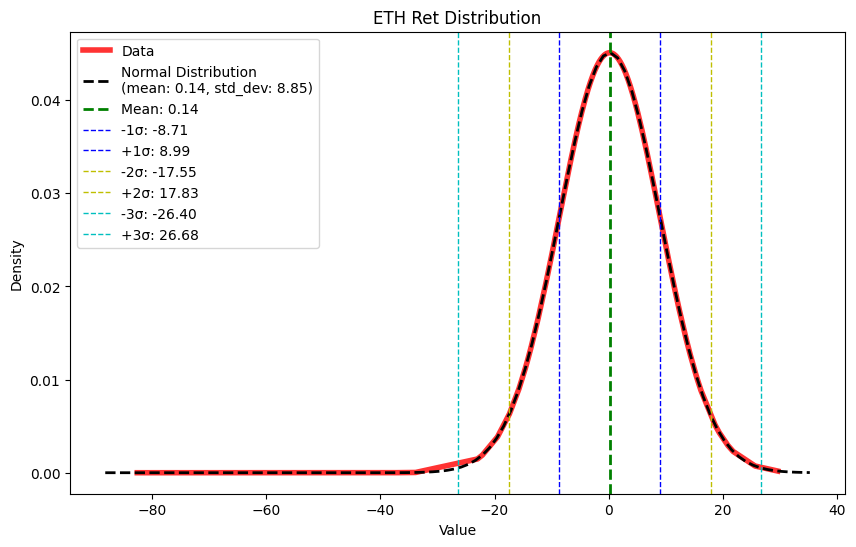

<Figure size 6000x900 with 0 Axes>

In [46]:
plot_distribution_with_sigmas2(sorted1)

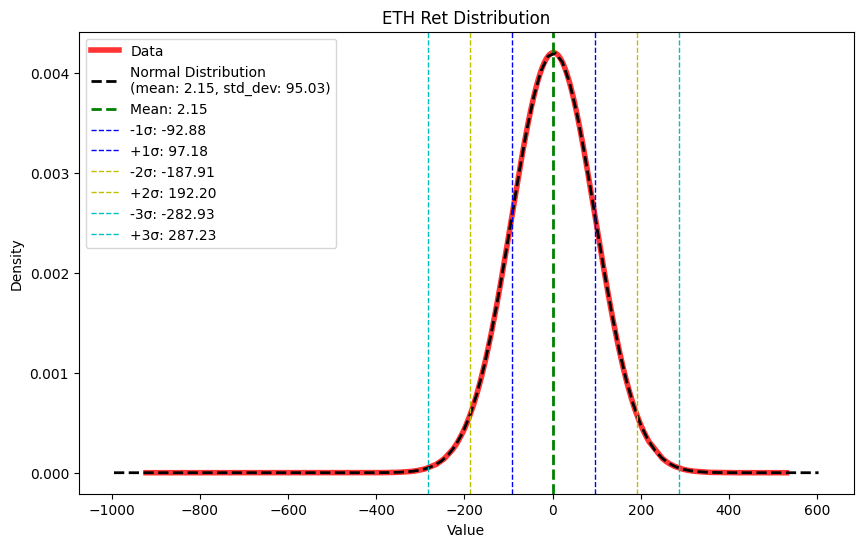

<Figure size 6000x900 with 0 Axes>

In [47]:
plot_distribution_with_sigmas2(sorted2)

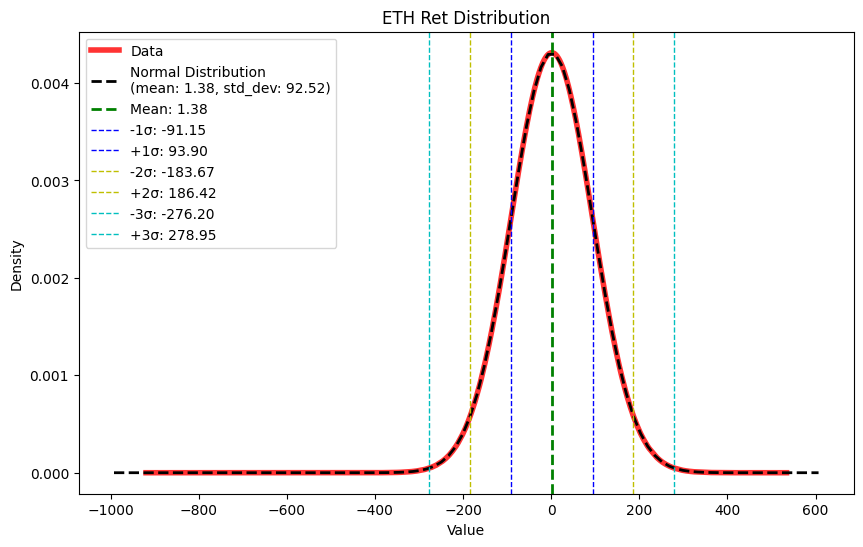

<Figure size 6000x900 with 0 Axes>

In [48]:
plot_distribution_with_sigmas2(sorted3)

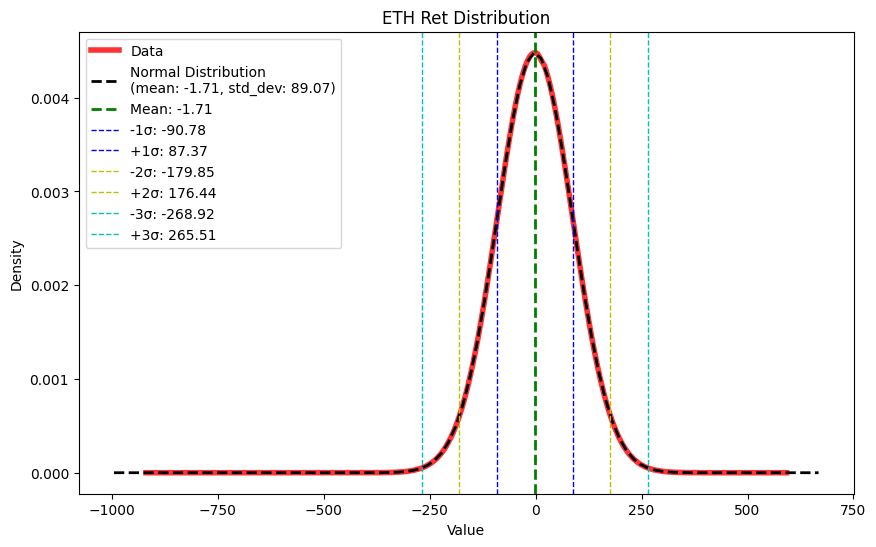

<Figure size 6000x900 with 0 Axes>

In [49]:
plot_distribution_with_sigmas2(sorted4)